# Pressure: An Observational Study 😨

Hypothesis: Higher pressure situations lessen the likelihood of field goal conversion.

In [139]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('..')

import pandas as pd
import numpy as np
import mysql.connector
import itertools
import dtale
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
import seaborn as sns
from datetime import datetime as dt
from util.data import clean, get_data

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load & Clean

In [140]:
cnx = mysql.connector.connect(user='root', password='mOntie20!mysql', host='127.0.0.1', database='nfl')
df = get_data(cnx, 'g.seas<=2019', xp=False, base='raw_6_cat')
df = clean(df, dropna=False)
df

,fkicker,good,dist,year,seasons,temperature,home_team,stadium,team,XP,...,humid,wind,away_game,postseason,iced,turf,precipitation,pressure,form,kicks
pid,,,,,,,,,,,,,,,,,,,,,
2166,AD-0800,1,38,2000,17,73,BUF,Ralph Wilson Stadium,TEN,0,...,1,10,1,0,0,1,0,1,0.764708,765
2185,AD-0800,1,27,2000,17,73,BUF,Ralph Wilson Stadium,TEN,0,...,1,10,1,0,0,1,0,1,0.807721,766
4565,AD-0800,1,36,2000,17,80,TEN,Adelphia Coliseum,TEN,0,...,1,13,0,0,1,0,0,5,NaN,767
8564,AD-0800,1,24,2000,17,61,PIT,Three Rivers Stadium,TEN,0,...,0,16,1,0,0,1,1,1,0.842837,768
8628,AD-0800,1,40,2000,17,61,PIT,Three Rivers Stadium,TEN,0,...,0,16,1,0,0,1,1,1,0.871516,769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862982,ZG-0050,1,30,2019,3,66,ARI,State Farm Stadium,ARI,0,...,0,0,0,0,0,0,0,1,0.826709,62
865338,ZG-0050,1,21,2019,3,66,ARI,State Farm Stadium,ARI,0,...,0,11,0,0,0,0,0,2,0.858217,63
868268,ZG-0050,1,22,2019,3,43,SEA,CenturyLink Field,ARI,0,...,1,7,1,0,0,1,0,1,1.000000,64


In [141]:
df.describe()

,good,dist,year,seasons,temperature,XP,age,altitude,humid,wind,away_game,postseason,iced,turf,precipitation,pressure,form,kicks
count,18803.000000,18803.000000,18803.000000,18803.000000,18803.000000,18803.0,18803.000000,18803.000000,18803.000000,18803.000000,18803.000000,18803.000000,18803.000000,18803.000000,18803.000000,18803.000000,18710.000000,18803.000000
mean,0.844865,36.881242,2009.516992,7.913099,60.776153,0.0,29.927139,0.033771,0.352178,6.549593,0.487901,0.040845,0.125033,0.445408,0.080413,1.400202,0.844876,255.230601
std,0.362043,10.070235,5.643918,5.162924,15.706069,0.0,5.250091,0.180645,0.477662,5.986469,0.499867,0.197935,0.330765,0.497024,0.271938,1.024004,0.124109,209.053136
min,0.000000,18.000000,2000.000000,1.000000,-6.000000,0.0,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,28.000000,2005.000000,4.000000,51.000000,0.0,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.772214,94.000000
50%,1.000000,37.000000,2010.000000,7.000000,64.000000,0.0,29.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.865337,201.000000
75%,1.000000,45.000000,2014.000000,11.000000,70.000000,0.0,33.000000,0.000000,1.000000,10.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.945632,362.000000
max,1.000000,76.000000,2019.000000,26.000000,109.000000,0.0,47.000000,1.000000,1.000000,40.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,1033.000000


## Explore

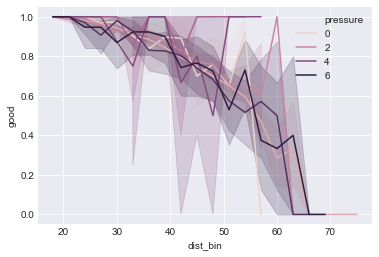

In [142]:
df_ = df.copy()
df_['dist_bin'] = 3*round(df_['dist']/3)
sns.lineplot(x='dist_bin', y='good', hue='pressure', data=df_)

In [143]:
df_long = df[df['dist']>=40].drop(['fkicker', 'home_team', 'stadium', 'team', 'XP', 'humid'], axis=1)
df_long['form'] = df['form'].fillna(method='bfill')
df_long.dropna(inplace=True)
df_long

,good,dist,year,seasons,temperature,age,altitude,wind,away_game,postseason,iced,turf,precipitation,pressure,form,kicks
pid,,,,,,,,,,,,,,,,
8628,1,40,2000,17,61,38,0,16,1,0,0,1,1,1,0.871516,769
8652,1,40,2000,17,61,38,0,16,1,0,0,1,1,2,0.894946,770
11064,0,46,2000,17,72,38,0,5,0,0,1,0,0,1,1.000000,771
12417,1,41,2000,17,44,38,0,10,1,0,0,0,0,1,0.842957,773
16254,0,44,2000,17,74,38,0,6,0,0,0,0,0,1,0.671096,777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844674,1,47,2019,3,56,24,0,3,1,0,0,1,1,1,0.813096,52
846996,1,50,2019,3,70,24,0,0,1,0,0,1,0,1,0.771461,56
851666,1,54,2019,3,77,24,0,8,1,0,0,0,0,1,0.883073,59


1    5880
2    1379
5     295
6     201
0     160
3      15
4      15
Name: pressure, dtype: int64


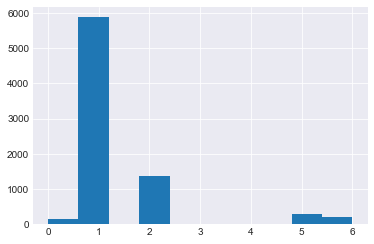

In [144]:
print(df_long['pressure'].value_counts())
df_long['pressure'].hist()

The distribution is very skewed. It may be necessary to collapse some of the categories. \[0,1\],\[2,3,4\],\[5,6\] (i.e. low, medium, high pressure)

In [145]:
df_long['pressure'] = df_long['pressure'].map({0:0, 1:0, 2:1, 3:1, 4:1, 5:2, 6:2})
print(df_long['pressure'].value_counts())

0    6040
1    1409
2     496
Name: pressure, dtype: int64


## Matching

* Mahalanobis distance with radius matching
* We need to perform balance measurements to check the marginal distributions of each covariate are satisfactorily similar.
* Marginal because multi-dimensional histograms are very coarse.

In [146]:
from util.matching import search_radii, match_frame
from scipy.stats import mannwhitneyu


df_long['pressure_bool'] = df_long['pressure'].astype(bool)
radii = np.arange(0,4,0.5)
balance_measures = search_radii(df_long.drop('pressure', axis=1), on='pressure_bool', dv='good', distance='mahalanobis', method='with_replacement', radii=radii, cont_test=mannwhitneyu)

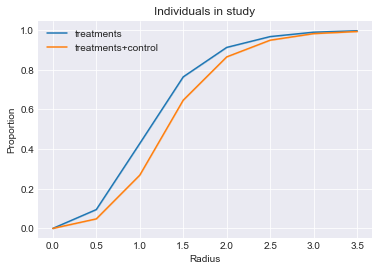

In [147]:
balance_norm = balance_measures.copy()
balance_norm['treatments'] = balance_norm['treatments']/df_long['pressure_bool'].sum()
balance_norm['samples'] = balance_norm['samples']/len(df_long)

sns.lineplot(x='radius', y='treatments', label='treatments', data=balance_norm)
sns.lineplot(x='radius', y='samples', label='treatments+control', data=balance_norm)
plt.title('Individuals in study')
plt.ylabel('Proportion')
plt.xlabel('Radius')
plt.legend()

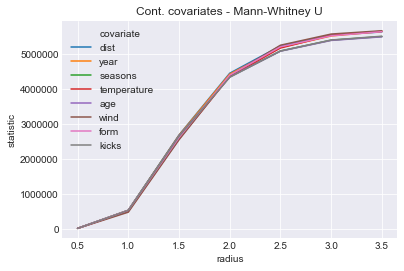

Text(0.5, 1.0, 'Binary covariates Z-score')

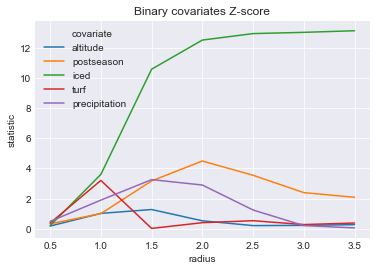

In [148]:
cont = ['dist','year','seasons','temperature','age','wind','form','kicks']
binary = ['postseason','iced','altitude','turf','precipitation']
sns.lineplot(x='radius', y='statistic', hue='covariate', data=balance_measures.loc[balance_measures['covariate'].isin(cont),:])
plt.title('Cont. covariates - Mann-Whitney U')
plt.show()
balance_measures['statistic'] = balance_measures['statistic'].abs()
sns.lineplot(x='radius', y='statistic', hue='covariate', data=balance_measures.loc[balance_measures['covariate'].isin(binary),:])
plt.title('Binary covariates Z-score')

In [153]:
df_matched = match_frame(df_long.drop('pressure', axis=1), 'pressure_bool', 'good', 'mahalanobis', 'with_replacement', 1).drop('pressure_bool', axis=1)
df_matched['pressure'] = df_long['pressure']
# df_matched['pressure'] = df_matched['pressure'].fillna(['pressure'] # fill original pressure back in
df_matched

,good,dist,year,seasons,temperature,age,altitude,wind,away_game,postseason,iced,turf,precipitation,form,kicks,pressure
pid,,,,,,,,,,,,,,,,
8628,1,40,2000,17,61,38,0,16,1,0,0,1,1,0.871516,769,0
32122,1,42,2000,17,30,38,0,7,1,0,0,1,0,0.929744,792,0
518956,1,42,2012,2,68,25,0,9,1,0,0,0,0,1.000000,27,0
599836,1,51,2013,3,66,26,0,0,1,0,0,1,0,0.780653,82,0
606083,1,47,2013,3,70,26,0,0,1,0,0,1,0,0.821742,85,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57314,0,41,2001,4,62,25,0,7,0,0,0,0,0,0.714441,177,1
789096,0,44,2018,2,70,23,0,0,1,0,0,1,0,0.984995,22,1
789142,0,52,2018,2,70,23,0,0,1,0,0,1,0,0.805107,23,2


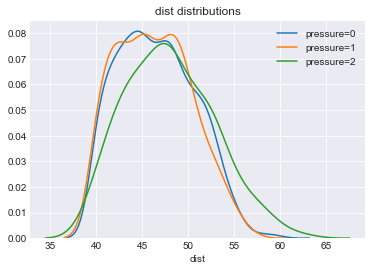

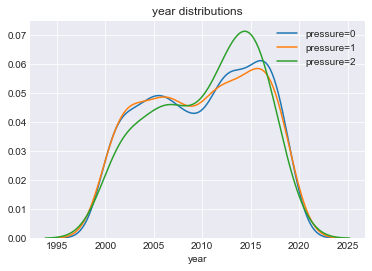

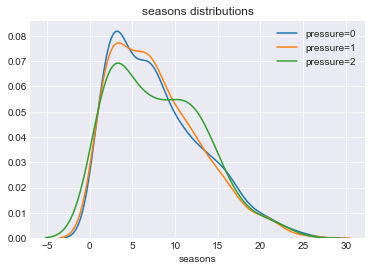

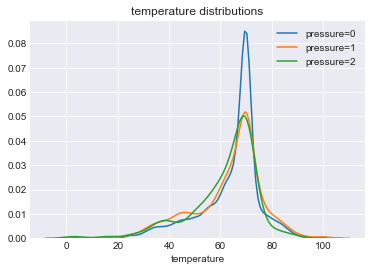

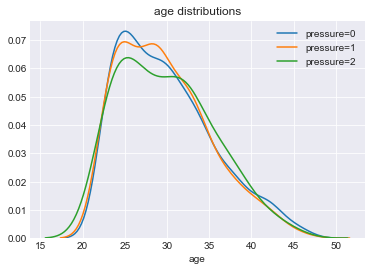

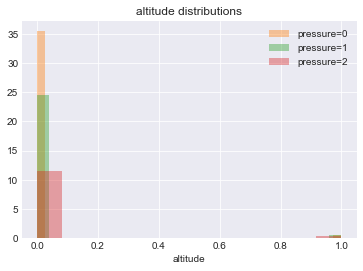

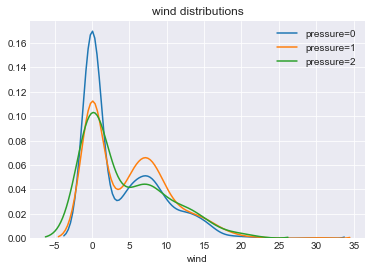

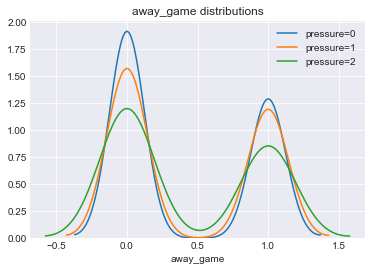

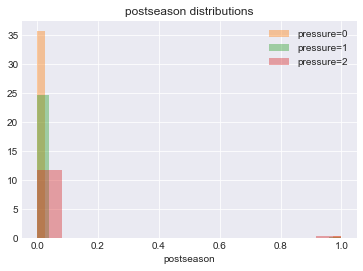

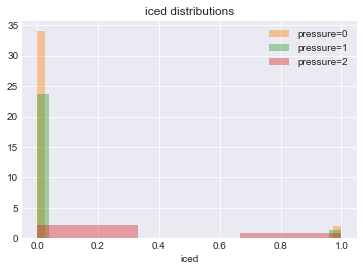

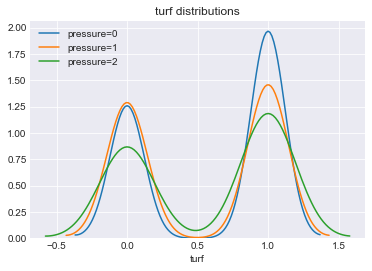

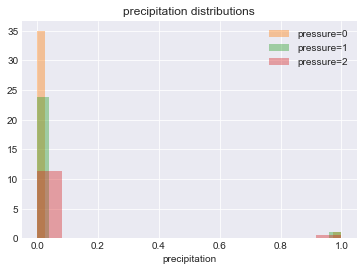

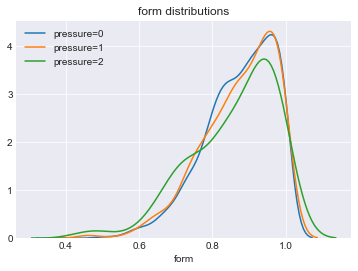

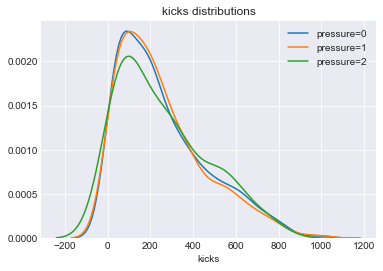

In [154]:
from util.matching import covariate_dists

covariate_dists(df_matched.drop('good', axis=1), on='pressure')

In [155]:
from util.matching import dist_test, binom_z_tests
mw = dist_test(df_matched.drop('good', axis=1), on='pressure', func=mannwhitneyu)
mw

Dichotamize variable of interest and try again.


In [156]:
df_low = df_matched.loc[df_matched['pressure']==0, :]
df_med = df_matched.loc[df_matched['pressure']==1, :]
df_high = df_matched.loc[df_matched['pressure']==2, :]
print(len(df_low), 'low-pressure samples.', len(df_med), 'medium-pressure samples.', len(df_high), 'high-pressure samples.')

1317 low-pressure samples.667 medium-pressure samples. 149 high-pressure samples.


## Model

We work within a Bayesian framework, setting a prior distribution on the true population proportion and update the prior after our observations. The Beta-Binomial conjugacy makes this process relatively pain-free.

In [63]:
from scipy.stats import beta
p_hat = df[df['dist']>=40]['good'].mean()
alpha_ = 12
beta_ = int(round(alpha_*(1-p_hat)/p_hat))
print(f'alpha: {alpha_}, beta: {beta_}')

alpha: 12, beta: 5


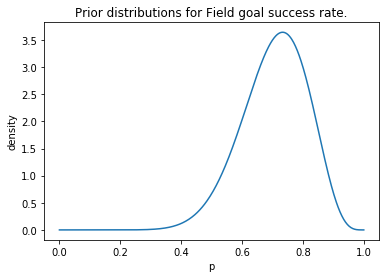

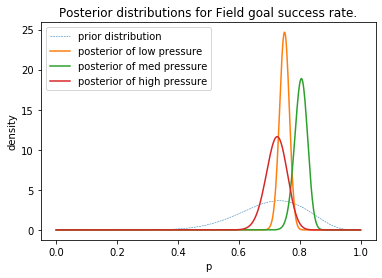

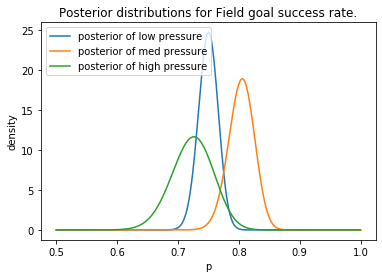

In [64]:
from util.bayes import BetaBinomial

# setup random variables
low = BetaBinomial(alpha_, beta_, 'low pressure')
medium = BetaBinomial(alpha_, beta_, 'med pressure')
high = BetaBinomial(alpha_, beta_, 'high pressure')
low.plot_prior(show=True)
plt.cla()

# update prior
low.observe(df_low['good'])
medium.observe(df_med['good'])
high.observe(df_high['good'])

# plot posterior
low.plot_posterior(prior=True)
medium.plot_posterior(prior=False)
high.plot_posterior(prior=False, show=True)

# zoom in
x = np.linspace(0.5,1,500)
low.plot_posterior(x, prior=False)
medium.plot_posterior(x, prior=False)
high.plot_posterior(x, prior=False, show=True)

# sample from posterior
samples = 20000
samples_posterior_low = low.sample(samples)
samples_posterior_med = medium.sample(samples)
samples_posterior_high = high.sample(samples)

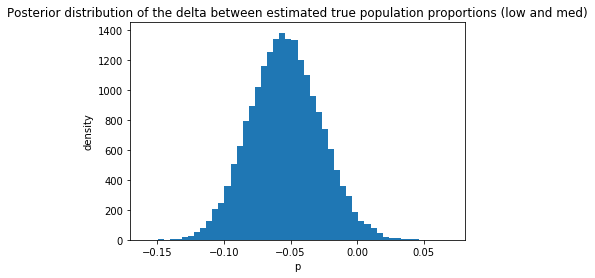

2 % likely that low pressure has a higher true population proportion of converted field goals than medium pressure.
-0.05 is the median difference, with a 50% credible interval of (0.0,-0.11).


In [65]:
posterior_diff = samples_posterior_low - samples_posterior_med

plt.hist(posterior_diff, histtype='stepfilled', bins=50)
plt.xlabel('p')
plt.ylabel('density')
plt.title('Posterior distribution of the delta between estimated true population proportions (low and med)')
plt.show()
print(int((samples_posterior_low>samples_posterior_med).mean()*100), r'% likely that low pressure has a higher true population proportion of converted field goals than medium pressure.')

from scipy.stats import bayes_mvs
alpha = 0.5
center, _, _ = bayes_mvs(posterior_diff, alpha=alpha)
print(f'{round(center.statistic,2)} is the median difference, with a {int(alpha*100)}% credible interval of ({round(center.statistic-center.minmax[0],2)},{round(center.statistic+center.minmax[-1],2)}).')

95 % likely relative lift of medium over low pressure kicks greater than 1%.
0.07 is the median relative lift, with a 50% credible interval of (0.0,0.15).


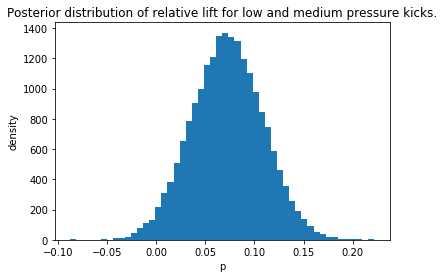

In [66]:
posterior_relative = (samples_posterior_med-samples_posterior_low)/samples_posterior_low
plt.hist(posterior_relative, histtype='stepfilled', bins=50)
plt.xlabel('p')
plt.ylabel('density')
plt.title('Posterior distribution of relative lift for low and medium pressure kicks.')
print(int((posterior_relative>0.01).mean()*100), r'% likely relative lift of medium over low pressure kicks greater than 1%.')

center, _, _ = bayes_mvs(posterior_relative, alpha=alpha)
print(f'{round(center.statistic,2)} is the median relative lift, with a {int(alpha*100)}% credible interval of ({round(center.statistic-center.minmax[0],2)},{round(center.statistic+center.minmax[-1],2)}).')

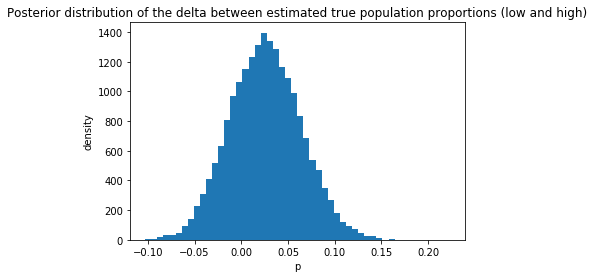

74 % likely that low pressure has a higher true population proportion of converted field goals than high pressure.
0.03 is the median difference, with a 50% credible interval of (0.0,0.05).


In [67]:
posterior_diff = samples_posterior_low - samples_posterior_high

plt.hist(posterior_diff, histtype='stepfilled', bins=50)
plt.xlabel('p')
plt.ylabel('density')
plt.title('Posterior distribution of the delta between estimated true population proportions (low and high)')
plt.show()
print(int((samples_posterior_low>samples_posterior_high).mean()*100), r'% likely that low pressure has a higher true population proportion of converted field goals than high pressure.')

center, _, _ = bayes_mvs(posterior_diff, alpha=alpha)
print(f'{round(center.statistic,2)} is the median difference, with a {int(alpha*100)}% credible interval of ({round(center.statistic-center.minmax[0],2)},{round(center.statistic+center.minmax[-1],2)}).')

19 % likely relative lift of high over low pressure kicks greater than 1%.
-0.03 is the median relative lift, with a 50% credible interval of (0.0,-0.07).


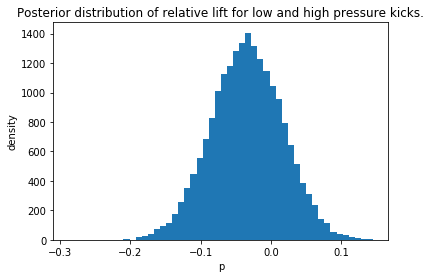

In [68]:
posterior_relative = (samples_posterior_high-samples_posterior_low)/samples_posterior_low
plt.hist(posterior_relative, histtype='stepfilled', bins=50)
plt.xlabel('p')
plt.ylabel('density')
plt.title('Posterior distribution of relative lift for low and high pressure kicks.')
print(int((posterior_relative>0.01).mean()*100), r'% likely relative lift of high over low pressure kicks greater than 1%.')

center, _, _ = bayes_mvs(posterior_relative, alpha=alpha)
print(f'{round(center.statistic,2)} is the median relative lift, with a {int(alpha*100)}% credible interval of ({round(center.statistic-center.minmax[0],2)},{round(center.statistic+center.minmax[-1],2)}).')